<a href="https://colab.research.google.com/github/francomanca93/fundamentos-de-estadistica-con-python/blob/eventos-aleatorios/3.%20Aplicar%20conceptos%20de%20probabilidad%20a%20eventos%20aleatorios/7_Funciones_de_distribuci%C3%B3n_discreta_y_continua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones de distribución discreta y continua

## Configuramos nuestro notebook

Montamos drive para acceder a la base de datos con la cual vamos a trabajar

In [1]:
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Dos conceptos claves: Valor esperado o media y varianza.

![media](https://imgur.com/iI23Ioi.png)
![varianza](https://imgur.com/pJ0twjQ.png)

## Distribucion de probabilidad discreta

Se denomina [distribución de variable discreta](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad#Distribuciones_de_variable_discreta) a aquella cuya función de probabilidad solo toma valores positivos en un conjunto de valores de ***X*** finito o infinito numerable. A dicha función se le llama función de masa de probabilidad.

Mas detalles en [distribución de probabilidad discreta de qwe.wiki](https://es.qwe.wiki/wiki/Probability_distribution#Discrete_probability_distribution)

![propiedades de distribucion de probabilidad discreta](https://imgur.com/b0UQpDG.png)

1. **Rango**: El rango de la función debe cumplir y contener a todos los valores de x. La probabilidad de los eventos debe ser mayor a 0 y no debe superar el valor de 1.
2. **Probabilidad**: El valor puntual de la probabilidad de la variable X será puntualmente la probabilidad de xi
3. **Probabilidad acumulada**: Es la suma de todas las probabilidades de obtener un valor igual o menor a un xi. 
4. **Regla de completitud de Espacio**: Debemos contemplar todos los valores posibles que puede tomar nuestra variable aleatoria x. Luego la sumatoria de todas las probabilidades de todos los valores que toma x debe sumar siempre 1.
5. **Valor esperado**: Es el promedio
6. **Varianza**: Es una medida de dispersión al cuadrado que relacion el valor esperado y el valor real. 

La [distribución binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial#Propiedades) es una distribución de probabilidad discreta que cuenta el número de éxitos en una secuencia de n ensayos de Bernoulli independientes entre sí, con una probabilidad fija p de ocurrencia del éxito entre los ensayos. 

La función binomial tiene esta formula:

![funcion binomial](https://imgur.com/0zUPBD7.png)

**¿Qué es una distribución binomial?**

- Es una distribución de probabilidades de variables aleatorias discretas
- Estas pueden tomar valores x={0,1,2,3… n}
- Lo que se busca con esta distribución es contar el numero de éxitos de repetir n veces un experimento.

**¿Cuándo se debe usar la distribución binomial?**

- Cuando hay un experimento que se repite n veces (el n en este caso es 8)
- Ese resultado solo puede tener dos resultados
- Las probabilidades de estos sucesos son CONSTANTES (en este caso p=0.3)

**Tenemos entonces definido**:

- n como el número de casos totales, es decir se probara 8 veces
- Tenemos p = 0.3 y (1-p) = 0.7 -> p=probabilidad de que el evento sea favorable o Éxito
- k seria el for, es decir este numero i que va de 0 a 8

**Como leer y entender el grafico**:

El grafico se lee de la siguiente manera:

- La probabilidad de que la variable aleatoria (VAD) tome el valor de 0 en 8 intentos es 0.05

<div align="left">
    <img src=https://imgur.com/o8WBZ4g.png width=70%>
</div>


Sumatoria de todos los valores de la funcion de probabilidad discreta binomial:  1.0000000000000002


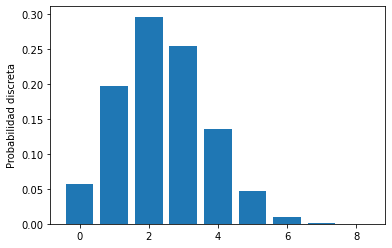

In [2]:
from scipy.stats import binom

p = 0.3 # Probabilidad de exito
n = 8 # Numero de intentos

x = list(range(0, 9, 1))
y = list([])

for i in x: 
  y.append(binom.pmf(i, p=p, n=n))

fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_ylabel('Probabilidad discreta')

print('Sumatoria de todos los valores de la funcion de probabilidad discreta binomial: ', np.sum(y))

Calculamos la media y la varianza asociadas a la variable aleatoria X

In [3]:
media = np.average(x, weights = y)
media

2.4

<div align="center">
    <img src=https://imgur.com/oHCm7ru.png width=50%>
</div>

In [4]:
errores = (x - media)
varianza = np.average(errores**2, weights=y)
varianza

1.68

In [5]:
media, varianza

(2.4, 1.68)

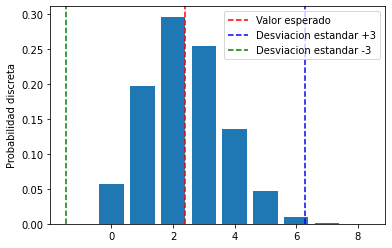

In [8]:
fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_ylabel('Probabilidad discreta')

ax.axvline(x = media, c='r', linestyle='--', label='Valor esperado')
ax.axvline(x = (media + 3*np.sqrt(varianza)), c='b', linestyle='--', label='Desviacion estandar +3')
ax.axvline(x = (media - 3*np.sqrt(varianza)), c='g', linestyle='--', label='Desviacion estandar -3')

ax.legend()

## Distribucion de probabilidad continua

Se denomina [variable continua](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad#Distribuciones_de_variable_continua) a aquella que puede tomar cualquiera de los infinitos valores existentes dentro de un intervalo. En el caso de variable continua la distribución de probabilidad es la integral de la función de densidad.

Mas detalles en [distribución de probabilidad continua de qwe.wiki](https://es.qwe.wiki/wiki/Probability_distribution#Continuous_probability_distribution)

![link text](https://imgur.com/e8zWXjz.png)

Igual que para los casos de distribucion de probabilidad discreta pero son integrales para una sumatoria de infinitos numero y no una sumatoria de numeros discretos.